## Data Analysis of IMDB Dataset

In this project, we will conduct an analysis of a dataset obtained from IMDB to determine whether there is a relationship between profitability and relevant variables.

*This was performed for a university course on data exploration and analysis.*

In [162]:
#load libraries
library(tidyr)
library(dplyr)
library(readr)
#import dataset
movies <- read_csv("Movies.csv", show_col_types = FALSE)

In [163]:
#view dataset
head(movies)

Color,Director,Reviews,Duration,Director_facebook_likes,Actor_3_facebook_likes,Actor_2_name,Actor_1_facebook_likes,Gross,Genre,⋯,Plot_keywords,Movie_imdb_link,Language,Content_rating,Budget,Year,Actor_2_facebook_likes,Imdb_score,Aspect_ratio,Movie_facebook_likes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action,⋯,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,English,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action,⋯,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,English,NA,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action,⋯,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,English,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action,⋯,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,English,PG-13,250000000,2012,23000,8.5,2.35,164000
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action,⋯,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,English,PG-13,263700000,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action,⋯,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,English,PG-13,258000000,2007,11000,6.2,2.35,0


### Addressing Missing Values

In [164]:
#look at each field for missing values
summary(movies)

    Color             Director            Reviews          Duration    
 Length:3891        Length:3891        Min.   :  1.00   Min.   : 34.0  
 Class :character   Class :character   1st Qu.: 72.25   1st Qu.: 95.0  
 Mode  :character   Mode  :character   Median :134.00   Median :106.0  
                                       Mean   :163.23   Mean   :109.9  
                                       3rd Qu.:221.75   3rd Qu.:120.0  
                                       Max.   :813.00   Max.   :330.0  
                                       NA's   :1        NA's   :1      
 Director_facebook_likes Actor_3_facebook_likes Actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:3891       
 1st Qu.:   10.0         1st Qu.:  183.0        Class :character  
 Median :   58.0         Median :  427.0        Mode  :character  
 Mean   :  781.3         Mean   :  753.5                          
 3rd Qu.:  226.0         3rd Qu.:  687.0                          
 Max.   :23000.0      

There are 226 missing values out of total of 3891 entries.

In [165]:
#find the total number of missing values
sum(is.na(movies)) 

[1] 226

In [166]:
#find missing values
missing_values <-sapply(movies, function(x) sum(is.na(x)))
#convert data into a dataframe and filter for fields with missing values
missing_values_df <- data.frame(
    MissingValueCount = missing_values
) %>%
    filter(MissingValueCount > 0) 
#display the dataframe
missing_values_df

,MissingValueCount
,<int>
Color,2
Reviews,1
Duration,1
Actor_3_facebook_likes,10
Actor_2_name,5
Actor_1_facebook_likes,3
Actor_1_name,3
Actor_3_name,10
Facenumber_in_poster,6


Among the fields with missing values, the three columns with the highest number of missing entries (Aspect Ratio, Content Rating, and Plot Keywords) cannot be imputed due to insufficient or non-recoverable information. For columns with only a small number of missing values, removing them will have minimal impact to the overall dataset integrity.

In [167]:
#remove all missing values
movies<-na.omit(movies)

In [168]:
#check if any missing values are left
any(is.na(movies))

[1] FALSE

### Visualising the Relationships Between Profit and Other Variables

In [169]:
#calculate profit
movies$Profit<- movies$Gross-movies$Budget
#filter for positive profit
positive_profit_movies <- movies %>%
    filter(Profit > 0, !is.na(Profit))

In [170]:
#load more relevant libraries
library(gridExtra)
library(scales)
library(grid)
library(ggplot2)

From the graph of **logged profit versus IMDB score**, there appears to be no strong correlation between the two variables. A significant concentration of movies is observed with IMDB scores between 5 and 7.5, yet these scores correspond to both very high and very low profits, indicating a lack of consistent relationship.

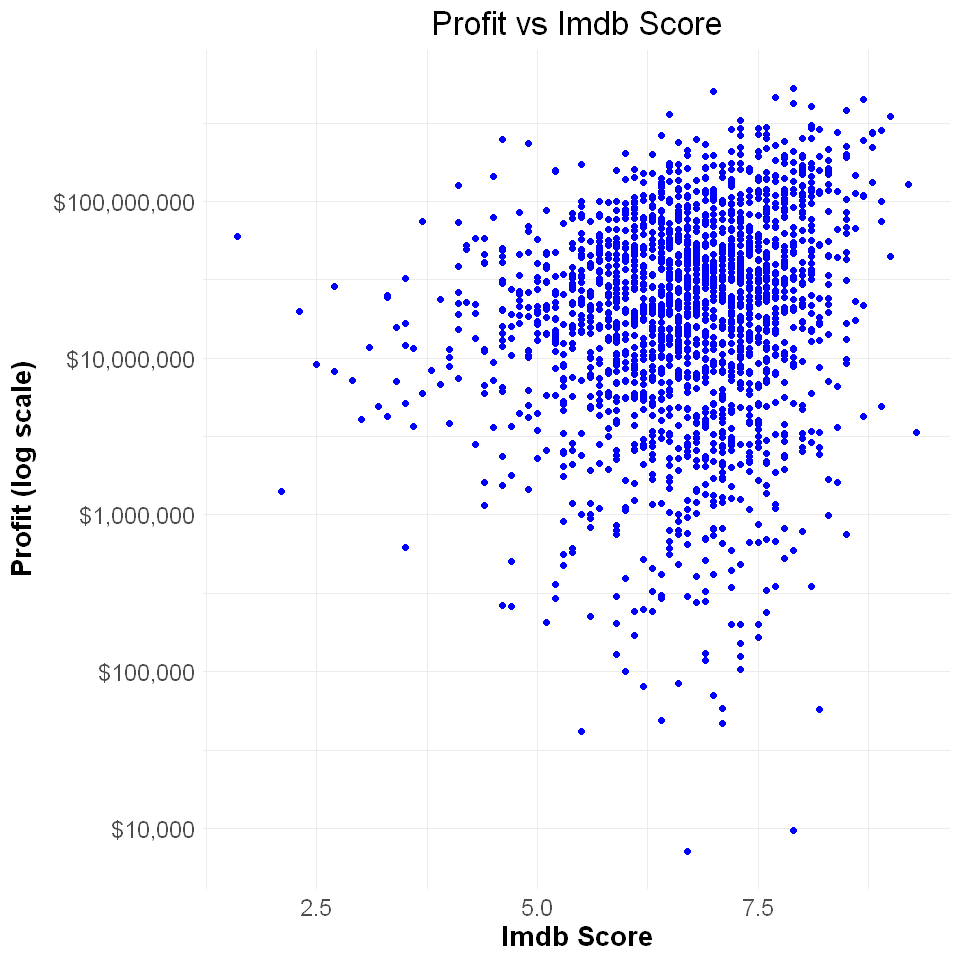

In [171]:
#Profit vs Imdb score
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(positive_profit_movies, aes(x=Imdb_score, y=Profit))+
  geom_point(alpha = 1, color="blue") +
  xlab("Imdb Score") +
  ylab("Profit (log scale)")+
  ggtitle("Profit vs Imdb Score")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )+
  scale_y_log10(labels = scales::dollar)

The graph of **logged profit versus the number of votes** indicates a positive relationship between the two variables. However, most movies are concentrated on the left side of the graph, corresponding to a lower number of votes. Within this range, profits show significant variability, spanning from very high to very low values.

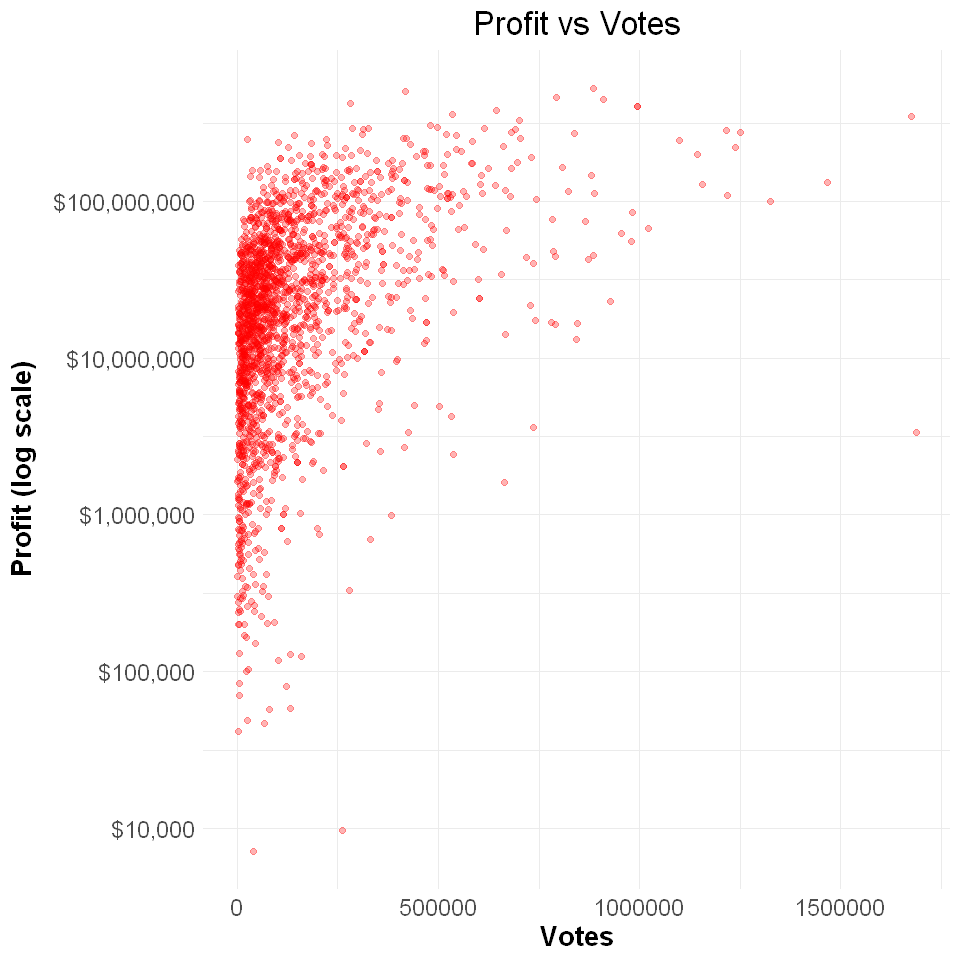

In [172]:
#Profit vs Votes
ggplot(positive_profit_movies, aes(x=Votes, y=Profit))+
  geom_point(alpha = 0.3, color="red") +
  xlab("Votes") +
  ylab("Profit (log scale)")+
  ggtitle("Profit vs Votes")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )+
  scale_y_log10(labels = scales::dollar)

The graph of **logged profit versus logged movie Facebook likes** indicates a slight positive relationship between the two variables. Distinct clusters of movies with likes between 10,000 and 100,000 shows relatively higher profits compared to the cluster of movies with likes between 100 and 1,000. This suggests that movies with a moderate to high level of Facebook engagement are associated with higher profits.

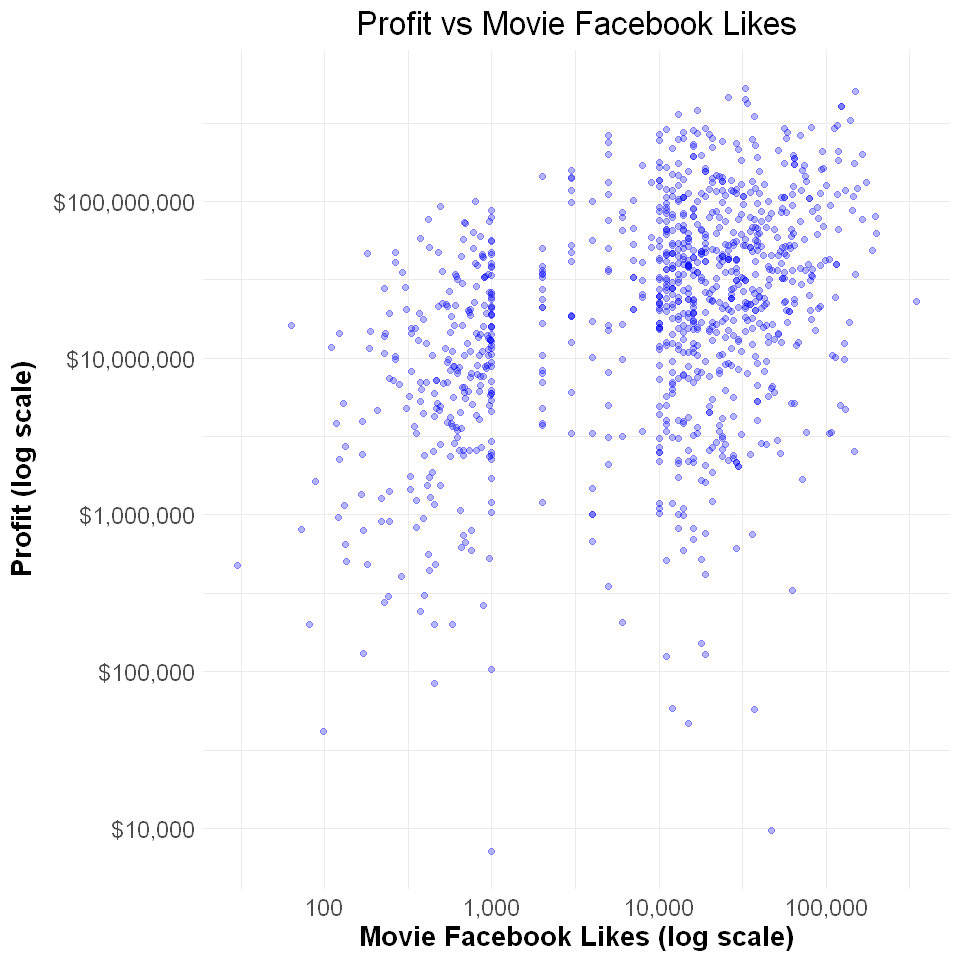

In [173]:
#filter out rows with missing or negative values for Movie Facebook likes
filtered_movies <- positive_profit_movies %>%
    filter(Movie_facebook_likes > 0, !is.na(Movie_facebook_likes))
#Profit vs Movie Facebook Likes
ggplot(filtered_movies, aes(x=Movie_facebook_likes, y=Profit))+
  geom_point(alpha = 0.3, color="blue") +
  xlab("Movie Facebook Likes (log scale)") +
  ylab("Profit (log scale)")+
  ggtitle("Profit vs Movie Facebook Likes")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )+
  scale_y_log10(labels = scales::dollar)+
  scale_x_log10(labels = scales::comma)

The graph of profit versus the number of reviews indicates a moderate positive relationship between these variables. Most movies have between 0 and 400 reviews, where profits show considerable variation. Interestingly, as the number of reviews increases, profits tend to stabilize, but the variation in profits decreases. This suggests that a higher number of reviews might be indicative of more consistent profit performance.

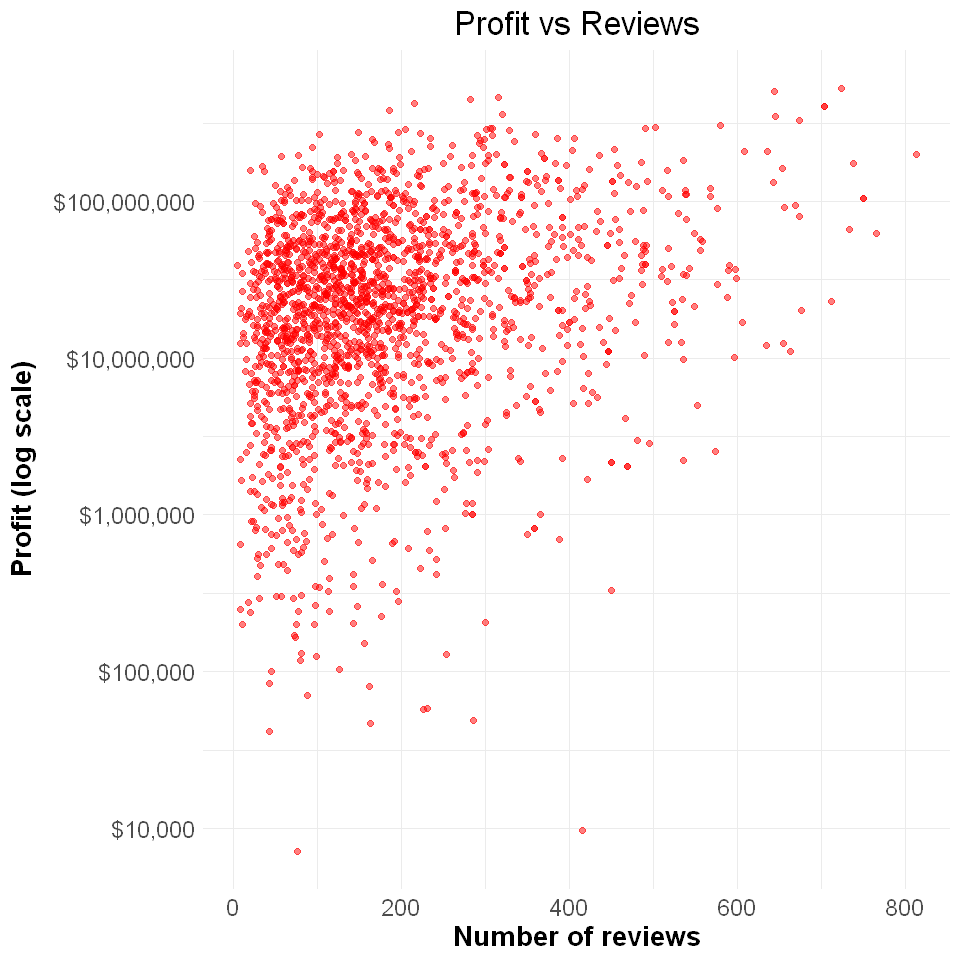

In [174]:
#Profit vs Reviews
ggplot(positive_profit_movies, aes(x=Reviews, y=Profit))+
  geom_point(alpha = 0.5, color="red") +
  xlab("Number of reviews") +
  ylab("Profit (log scale)")+
  ggtitle("Profit vs Reviews")+
  theme_minimal()+
  scale_y_log10(labels = scales::dollar)+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )

**Summary of Findings**

Overall, the number of votes, movie Facebook likes, and reviews all demonstrated a positive relationship with profit. Among these variables, IMDB score appeared to have a weaker and less noticeable correlation with profit. Interestingly, movies with fewer votes, likes, or reviews exhibited greater variability in their profit margins, suggesting that limited audience engagement can result in both high and low profit outcomes.

For the analysis, profit was logged to better visualize the relationships over a wide range of values. This transformation helped reveal trends while minimizing the skew caused by extreme profit values. It should be noted that negative profit values were excluded in this analysis due to the focus on logarithmic scaling, which is undefined for negative values.

These findings highlight the potential influence of audience engagement metrics (such as votes, likes, and reviews) on a movie’s profitability. 

### Finding Correlations between Variables

We will use the Pearson correlation coefficient to find linear relationships between the variables which are continuous or approximately continuous (e.g. Facebook likes). 

In [175]:
library(corrplot)
#select numeric variables
movies_num<-movies %>% select_if(is.numeric)

In [176]:
#find correlation between variables
cor<-cor(movies_num)
#view in correlation matrix
library(knitr)
kable(cor, caption = "Correlation Matrix")



Table: Correlation Matrix

|                          |    Reviews|   Duration| Director_facebook_likes| Actor_3_facebook_likes| Actor_1_facebook_likes|      Gross|      Votes| Cast_total_facebook_likes| Facenumber_in_poster|     Budget|       Year| Actor_2_facebook_likes| Imdb_score| Aspect_ratio| Movie_facebook_likes|     Profit|
|:-------------------------|----------:|----------:|-----------------------:|----------------------:|----------------------:|----------:|----------:|-------------------------:|--------------------:|----------:|----------:|----------------------:|----------:|------------:|--------------------:|----------:|
|Reviews                   |  1.0000000|  0.2283986|               0.1768236|              0.2536834|              0.1638653|  0.4612225|  0.5902822|                 0.2459289|           -0.0344844|  0.1029625|  0.4184055|              0.2519505|  0.3478511|    0.1796620|            0.7030381|  0.0386889|
|Duration                  |  0.2283986|  1.000000

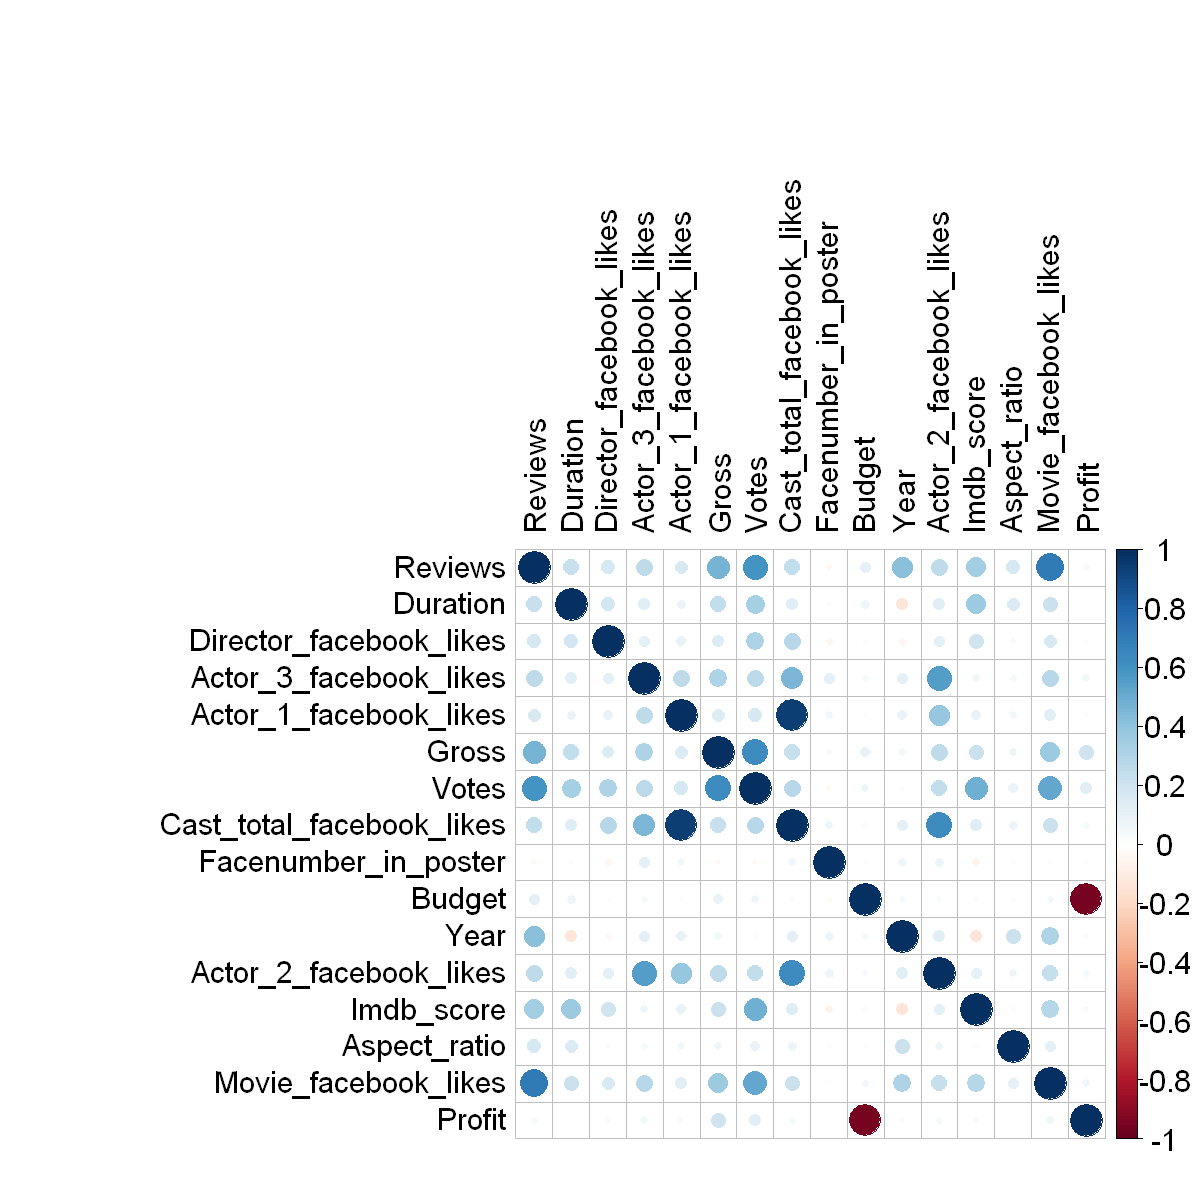

In [177]:
#visualise correlation matrix
options(repr.plot.width = 10, repr.plot.height = 10)
corrplot(cor, method="circle",
         tl.col="black", tl.cex = 1.5,
        cl.cex = 1.5)

The correlation matrix highlights several key relationships between variables. Notably, cast total Facebook likes and actor 1 Facebook likes show the strongest positive correlation, indicating that a higher level of engagement on these platforms is closely associated with other variables such as votes and movie Facebook likes. Additionally, the number of reviews also demonstrates a strong positive correlation with votes and Facebook engagement metrics, reinforcing the influence of social media and audience feedback on overall performance metrics.

Interestingly, the strongest negative correlation is observed between profit and budget. This suggests that movies with larger budgets do not necessarily yield higher profits. Instead, smaller-budget films might achieve higher profitability, possibly due to lower production costs or more focused audience targeting.

### Visualising Strong Correlations

In [156]:
#remove lower half triangle of correlation matrix
cor[lower.tri(cor)]<-NA
cor<-na.omit(cor)
#save correlation matrix as a table
cor2<-as.data.frame(as.table(cor))

In [157]:
#filter for strong correlations between 0.7 and 0.9
strong_corr<-cor2[cor2$Freq>0.7 & cor2$Freq<0.9,]
strong_corr

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
15,Reviews,Movie_facebook_likes,0.7030381


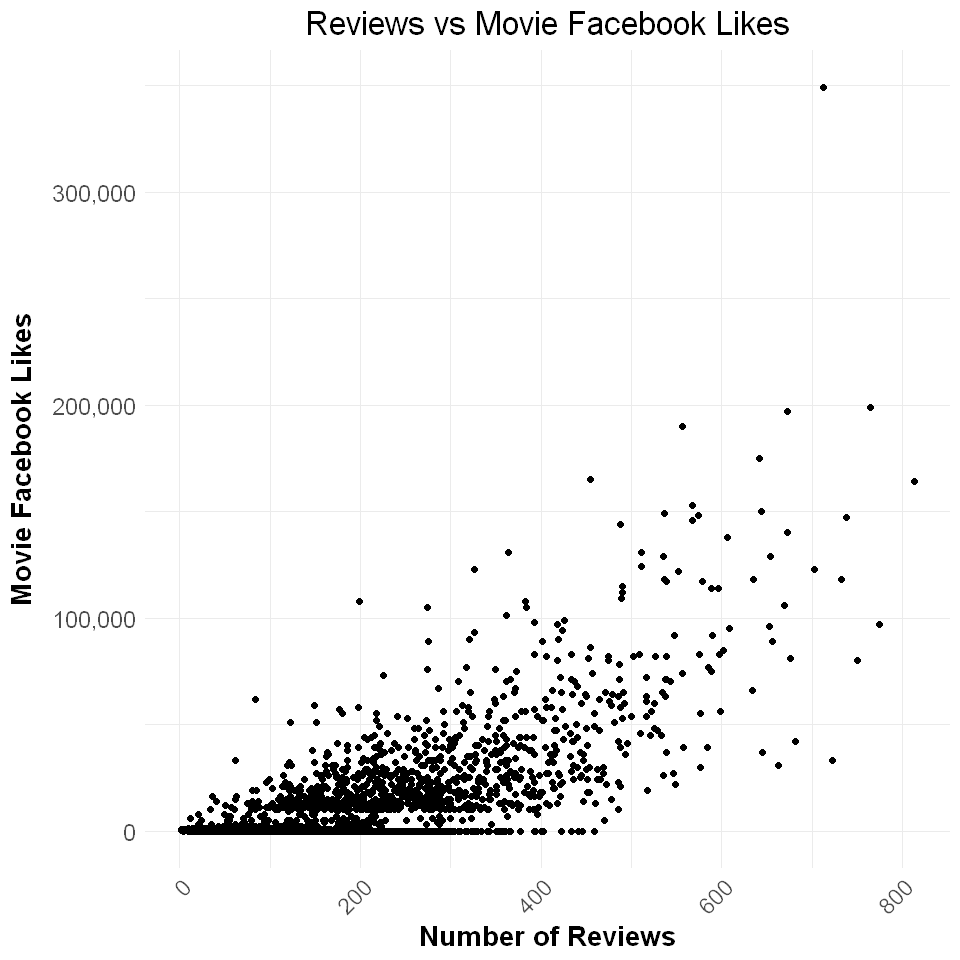

In [158]:
#plot strong correlations
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(movies, aes(x=Reviews, y=Movie_facebook_likes))+
  geom_point()+
  xlab("Number of Reviews")+
  ylab("Movie Facebook Likes")+
  scale_y_continuous(labels = scales::comma)+ 
  theme_minimal()+
  ggtitle("Reviews vs Movie Facebook Likes")+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )

Among the variables analyzed, there is only one pair with a strong positive correlation (between 0.7 and 0.9): the number of Facebook likes a movie has and the number of reviews it receives. This relationship can likely be attributed to the influence of viewers who enjoy the movie and actively engage on social media. These viewers not only provide likes to the movie or its actors but are also more inclined to share their opinions by posting reviews.

### Visualising Weak Correlations

In [159]:
#filter for weak correlations between 0.25 and 0.45
weak_corr<-cor2[cor2$Freq>0.25 & cor2$Freq<0.45,]

In [160]:
#order the weak correlations
weak_corr<-weak_corr[order(weak_corr$Freq),]
weak_corr

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
12,Reviews,Actor_2_facebook_likes,0.2519505
4,Reviews,Actor_3_facebook_likes,0.2536834
13,Reviews,Imdb_score,0.3478511
11,Reviews,Year,0.4184055


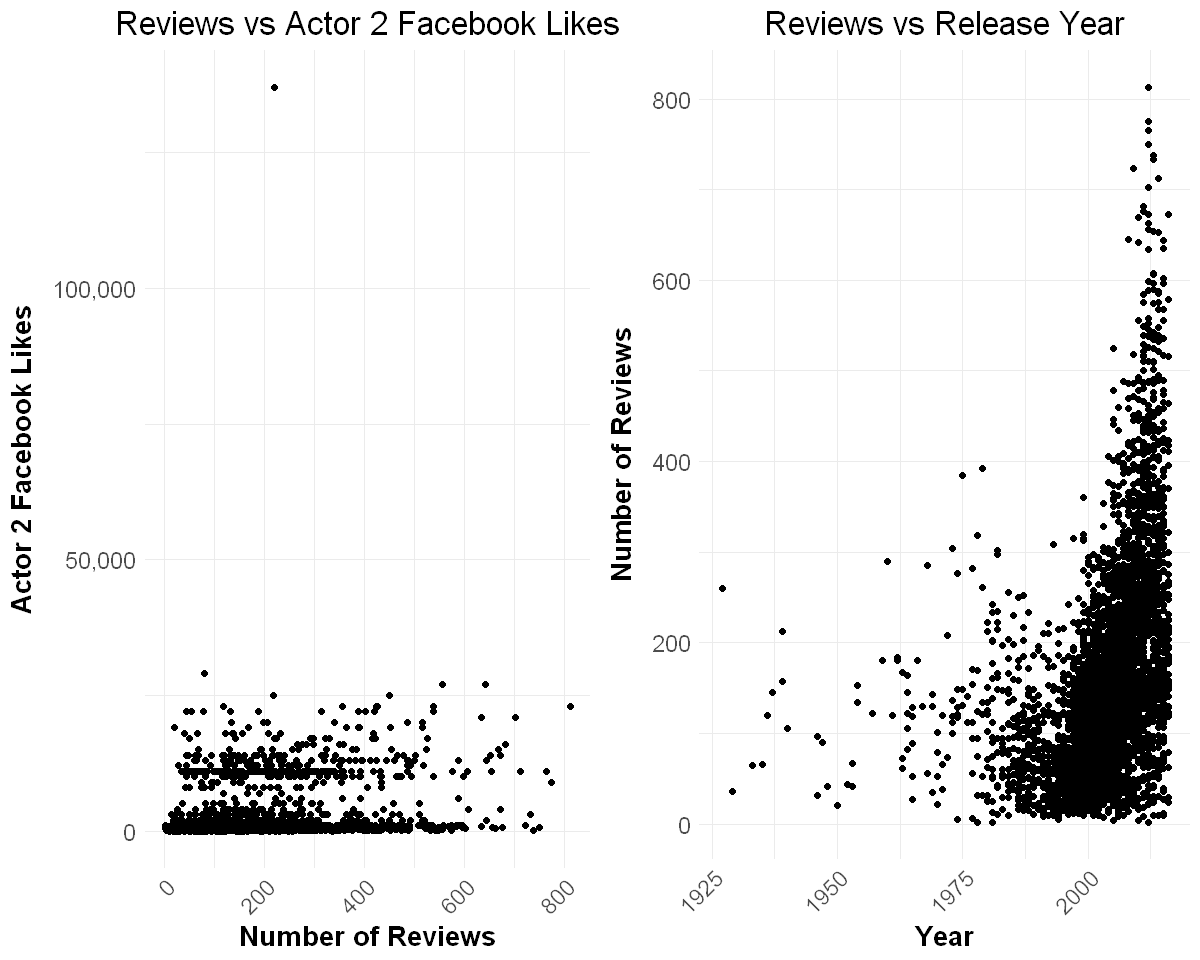

In [129]:
#plot two of the the weak correlations
options(repr.plot.width = 10, repr.plot.height = 8)
a<- ggplot(movies, aes(x=Reviews, y=Actor_2_facebook_likes))+
  geom_point()+
  xlab("Number of Reviews")+
  ylab("Actor 2 Facebook Likes")+
  ggtitle("Reviews vs Actor 2 Facebook Likes")+
  scale_y_continuous(labels = scales::comma)+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )
b<- ggplot(movies, aes(y=Reviews, x=Year))+
  geom_point()+
  ylab("Number of Reviews")+
  xlab("Year")+
  ggtitle("Reviews vs Release Year")+
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size= 20),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )
grid.arrange(a,b, ncol=2)

For variables with weak correlations, the number of reviews might be higher for more recently released movies, likely due to the growing use of social media and the convenience of posting reviews online. Additionally, the number of Facebook likes for Actor 2 may show a weak correlation with the number of reviews, as users who engage with actors on social media are more likely to leave feedback about the movies they appear in.